<a href="https://colab.research.google.com/github/AlvaroBecker/CodingDojoTareas-/blob/main/ensayo_examen_de_grado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
def format_drive_url(url):
    file_id = url.split('/')[-2]
    download_url = f'https://drive.google.com/uc?id={file_id}&export=download'
    return download_url
url = 'https://drive.google.com/file/d/1-AOpoRiQm1758XGGZkIo0uJ3hhjVVfj4/view?usp=sharing'
direct_link = format_drive_url(url)


 1) El primer paso en este proceso es usar Python para limpiar los datos para tenerlo listo para los análisis. Ustedes deben:

  a)Identificar y abordar cualquier valor duplicado.

  b)Identificar y abordar cualquier dato que falte en este conjunto de datos. 

  c)Trátenlos de forma adecuada. Incluyan una breve descripción en el método que suelen tratar con los valores que faltan junto con una justificación para el uso de ese método.

  d)Asegúrense de que todas las columnas coincidan con los tipos de datos  enumerados en el diccionario de datos.

  e)Identifiquen y aborden cualquier inconsistencias en los valores categóricos (ejemplo: cat, Cat, cats).

  f)Identifiquen y aborden cualquier punto de datos inapropiados o inusuales (ejemplo: la edad no puede ser 325).

2) El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:

  a)Dos tipos diferentes de visualizaciones de exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo del código.

  b)Dos tipos diferentes de visualizaciones de exploratorias multivariantes. 
    Cada visualización debe incluir una breve interpretación dentro del archivo del código.
  

Diccionario de datos 

*La tasa de alfabetización se calcula tomando el número de personas alfabetizadas en ese grupo de edad y sexo dividido por el total de número de personas en ese grupo. La alfabetización se define como la habilidad de leer y escribir con compresión, una declaración breve y simple sobre la vida cotidiana. Las tasas de alfabetización en un 100 % o cerca de ello indican que (casi) cada individuo en ese grupo de rango de edad y sexo es capaz de leer y escribir, al menos a un nivel básico.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv(direct_link)

In [8]:
df


,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
...,...,...,...,...,...,...
4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.8972553999999999
4951,Sub-Saharan Africa,Zimbabwe,2014,25-64,total,0.8878737
4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.7342576
4953,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.9272311000000001


In [9]:
df.shape

(4955, 6)

In [10]:
df.dtypes

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

Debido a que necesitamos tratar la columna Literacy rate como float, ya que Literacy rate contiene numeros flotantes, se cambiara el tipo de esta a lo que se necesite

In [11]:
df.dtypes

Region           object
Country          object
Year              int64
Age              object
Gender           object
Literacy rate    object
dtype: object

In [12]:
df.describe(include='all')

,Region,Country,Year,Age,Gender,Literacy rate
count,4950,4955,4955.000000,4955,4955,4955
unique,7,155,NaN,4,3,4835
top,Latin America and the Caribbean,Mexico,NaN,15+,female,1.0
freq,1410,108,NaN,1260,1652,28
mean,NaN,NaN,2013.987891,NaN,NaN,NaN
std,NaN,NaN,2.746204,NaN,NaN,NaN
min,NaN,NaN,2010.000000,NaN,NaN,NaN
25%,NaN,NaN,2011.000000,NaN,NaN,NaN
50%,NaN,NaN,2014.000000,NaN,NaN,NaN
75%,NaN,NaN,2016.000000,NaN,NaN,NaN


1) El primer paso en este proceso es usar Python para limpiar los datos para tenerlo listo para los análisis. Ustedes deben:

a)Identificar y abordar cualquier valor duplicado.

In [13]:
df.loc[df.duplicated()].count()

Region           0
Country          0
Year             0
Age              0
Gender           0
Literacy rate    0
dtype: int64

Verificamos de forma visual que no existen valores duplicados

In [14]:
df.groupby(['Region', 'Country','Year','Gender'])['Literacy rate'].unique()

Region                     Country      Year  Gender
Central and Southern Asia  Afghanistan  2011  female    [0.1761206, 0.08412760000000001, 0.19670490000...
                                              male                                  [0.454171, 0.3779481]
                                              total     [0.3174112, 0.46990049999999994, 0.2315362, 0....
                                        2018  female         [0.2980521, 0.5625475, 0.1433139, 0.0347429]
                                              male      [0.5547545, 0.7408480000000001, 45.384%, 0.247...
                                                                              ...                        
Sub-Saharan Africa         Zimbabwe     2011  male      [0.8776480999999999, 0.8959058, 0.8738973, 0.8...
                                              total     [0.8358271, 0.909307, 0.8277751999999999, 0.59...
                                        2014  female         [0.8828383, 0.9318835, 0.8804848, 0.73

Encontramos un dato sospechoso en este procedimiento, este dato no corresponde al tipo de datos de su columna (45.384%)

Verificamos los datos que no cumplen con su tipo en esa columna 


d)Asegúrense de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.

In [15]:
valores_no_flotantes=df.loc[pd.to_numeric(df['Literacy rate'], errors='coerce').isnull(), 'Literacy rate']
valores_no_flotantes

18    45.384%
Name: Literacy rate, dtype: object

Ahora arreglamos estos datos


In [16]:
df.loc[pd.to_numeric(df['Literacy rate'], errors='coerce').isnull(), 'Literacy rate']=valores_no_flotantes.apply((lambda x: float(x[:-1])/100))

Verificamos los resultados

In [17]:
df.loc[pd.to_numeric(df['Literacy rate'], errors='coerce').isnull(), 'Literacy rate']

Series([], Name: Literacy rate, dtype: object)

In [18]:
df.isnull().any()

Region            True
Country          False
Year             False
Age              False
Gender           False
Literacy rate    False
dtype: bool

En este caso solamente una columna posee datos nulos, contaremos cuantos hay


In [19]:
df['Region'].isnull().sum()

5

Exploremos estos 5 datos

In [20]:
nulos=df.loc[df['Region'].isnull()]
nulos

,Region,Country,Year,Age,Gender,Literacy rate
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
464,NaN,Uzbekistan,2016,65+,female,0.9966974999999999
465,NaN,Uzbekistan,2016,65+,male,0.9990176
466,NaN,Uzbekistan,2016,65+,total,0.9977187999999999


In [21]:
nulos.index

Int64Index([3, 4, 464, 465, 466], dtype='int64')

In [22]:
df.iloc[nulos.index]

,Region,Country,Year,Age,Gender,Literacy rate
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
464,NaN,Uzbekistan,2016,65+,female,0.9966974999999999
465,NaN,Uzbekistan,2016,65+,male,0.9990176
466,NaN,Uzbekistan,2016,65+,total,0.9977187999999999


Podemos observar que estos 5 datos pertenesen a los paises de Afghanistan y Uzbekistan, es posible que sus regiones aparezcan dentro del dataset, asi que los buscaremos y rellenaremos los datos faltantes 

In [23]:
df.loc[(df['Country']=='Afghanistan') | (df['Country']=='Uzbekistan')]

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,NaN,Afghanistan,2011,15-24,female,0.3211322
4,NaN,Afghanistan,2011,15-24,male,0.6187907
...,...,...,...,...,...,...
462,Central and Southern Asia,Uzbekistan,2016,25-64,male,1.0
463,Central and Southern Asia,Uzbekistan,2016,25-64,total,1.0
464,NaN,Uzbekistan,2016,65+,female,0.9966974999999999
465,NaN,Uzbekistan,2016,65+,male,0.9990176


In [24]:
#Agrupamos las regiones por su pais y rellenamos los datos faltantes con la region mas comun de su grupo
df['Region'] = df.groupby('Country')['Region'].apply(lambda x: x.fillna(x.mode().iloc[0]))
#Esto se hace debido a que, para este caso, cada pais pertenece  una region en especifico y segun la data se recogen datos en distintas ocaciones de un mismo pais
#por lo que rellenarlos con la moda de la region de cada pais resultara siempre en la region que pertenece su pais.

In [25]:
df

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,15+,female,0.1761206
1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,Central and Southern Asia,Afghanistan,2011,15+,total,0.3174112
3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.3211322
4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.6187907
...,...,...,...,...,...,...
4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.8972553999999999
4951,Sub-Saharan Africa,Zimbabwe,2014,25-64,total,0.8878737
4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.7342576
4953,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.9272311000000001


In [26]:
df.iloc[nulos.index]

,Region,Country,Year,Age,Gender,Literacy rate
3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.3211322
4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.6187907
464,Central and Southern Asia,Uzbekistan,2016,65+,female,0.9966974999999999
465,Central and Southern Asia,Uzbekistan,2016,65+,male,0.9990176
466,Central and Southern Asia,Uzbekistan,2016,65+,total,0.9977187999999999


In [27]:
df_sorted=df.copy().sort_values(by=['Country','Year','Age','Gender'])



In [28]:
mask = df['Literacy rate'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()
filas_no_numericas = df[mask]
df['Literacy rate']=df['Literacy rate'].astype(float)



In [29]:
df.shape

(4955, 6)

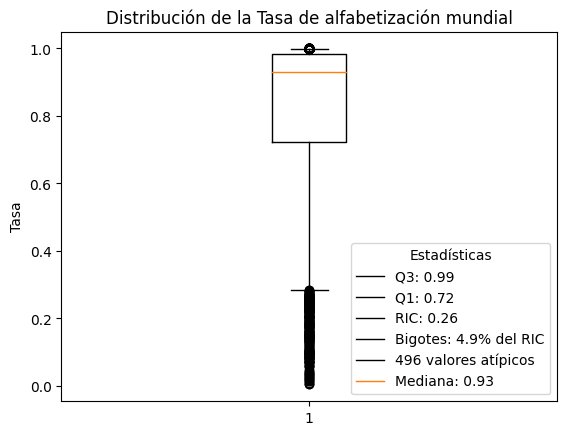

In [30]:

#Libreria boxplot https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
Literacy_rates = df['Literacy rate']

# Calcular los cuartiles y la mediana
q1, mediana, q3 = np.percentile(Literacy_rates, [25, 50, 75])

# Calcular Rango Intercuartílico (RIC)
ric = q3 - q1

# Crear boxplot de la tasa diaria de salario de los empleados
bp = plt.boxplot(Literacy_rates, whis=[5, 95])
plt.ylabel('Tasa')
plt.title('Distribución de la Tasa de alfabetización mundial')

# Contar valores atípicos
outliers = bp['fliers'][0].get_ydata()
num_outliers = np.count_nonzero(outliers)

# Calcular porcentaje de bigotes con respecto al RIC
whisker_percent = (bp['whiskers'][1].get_ydata()[1] - bp['whiskers'][1].get_ydata()[0]) / ric

# Agregar leyenda con estadísticas del boxplot
legend_text = [
    f'Q3: {q3:.2f}',
    f'Q1: {q1:.2f}',
    f'RIC: {ric:.2f}',
    f'Bigotes: {whisker_percent * 100:.1f}% del RIC',
    f'{num_outliers} valores atípicos',
    f'Mediana: {mediana:.2f}',
]

plt.legend(legend_text, loc='lower right', title="Estadísticas")

plt.show()

A través de este gráfico, podemos ver que la mediana se encuentra en el 93% de la tasa de alfabetización, lo que indica que gran parte de la población posee una tasa bastante alta. Esto nos sugiere que debemos fijarnos en los países que puedan tener una alfabetización menor a la mediana. Un buen indicativo es el cuartil 1 con un porcentaje del 72% y los valores atípicos de 496 (alrededor del 10% de los datos). Para profundizar en esta información, estudiaremos los países que estén por debajo de este.

In [31]:
lower_rate=df.loc[df["Literacy rate"]<=0.72].sort_values(by='Literacy rate')

In [32]:
lower_rate

,Region,Country,Year,Age,Gender,Literacy rate
4688,Sub-Saharan Africa,Sierra Leone,2013,65+,female,0.004025
3989,Sub-Saharan Africa,Chad,2015,65+,female,0.005456
4700,Sub-Saharan Africa,Sierra Leone,2018,65+,female,0.007178
3821,Sub-Saharan Africa,Benin,2012,65+,female,0.013565
4385,Sub-Saharan Africa,Mali,2010,65+,female,0.015607
...,...,...,...,...,...,...
509,Eastern and South-Eastern Asia,Cambodia,2015,25-64,female,0.719151
1591,Latin America and the Caribbean,Brazil,2011,65+,total,0.719623
4494,Sub-Saharan Africa,Mozambique,2017,25-64,male,0.719629
4151,Sub-Saharan Africa,Ethiopia,2017,15-24,female,0.719725


In [33]:
lowest=lower_rate.groupby(['Region']).Region.count().sort_values(ascending=False)

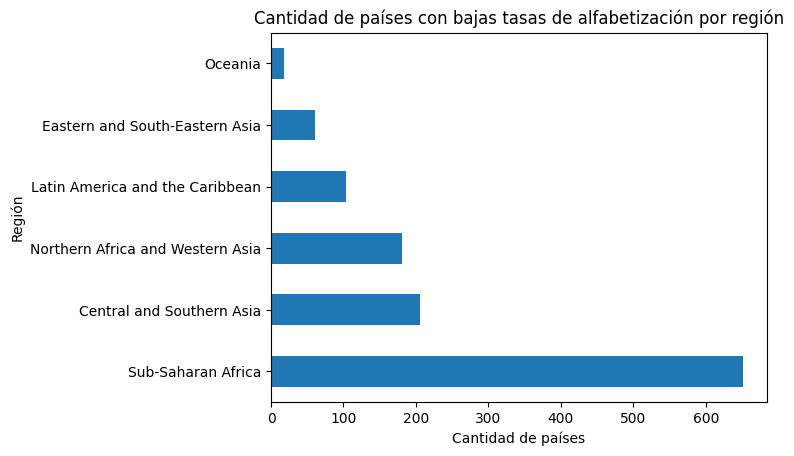

In [34]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras horizontal
fig, ax = plt.subplots()
lowest.plot(kind='barh', ax=ax)

# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('Cantidad de países')
ax.set_ylabel('Región')
ax.set_title('Cantidad de países con bajas tasas de alfabetización por región')

# Mostrar el gráfico
plt.show()


Como se puede apreciar con este gráfico, la mayor cantidad de países que tienen una tasa de alfabetización por debajo del 72% pertenecen a la región de África subsahariana. Esta información nos permite reducir el área de focalización en la que ocuparnos para el siguiente proyecto de esta ONG.

In [37]:
subsaharan_africa= lower_rate.loc[lower_rate['Region']=='Sub-Saharan Africa'].sort_values(by='Literacy rate')
subsaharan_africa

,Region,Country,Year,Age,Gender,Literacy rate
4688,Sub-Saharan Africa,Sierra Leone,2013,65+,female,0.004025
3989,Sub-Saharan Africa,Chad,2015,65+,female,0.005456
4700,Sub-Saharan Africa,Sierra Leone,2018,65+,female,0.007178
3821,Sub-Saharan Africa,Benin,2012,65+,female,0.013565
4385,Sub-Saharan Africa,Mali,2010,65+,female,0.015607
...,...,...,...,...,...,...
4034,Sub-Saharan Africa,Congo,2011,25-64,female,0.717576
4889,Sub-Saharan Africa,United Republic of Tanzania,2012,25-64,female,0.718649
4274,Sub-Saharan Africa,Kenya,2014,25-64,female,0.718871
4494,Sub-Saharan Africa,Mozambique,2017,25-64,male,0.719629


<ipython-input-60-cdcf90a2f1e3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_subsaharan_africa['Country'], rotation=90, fontsize='small')


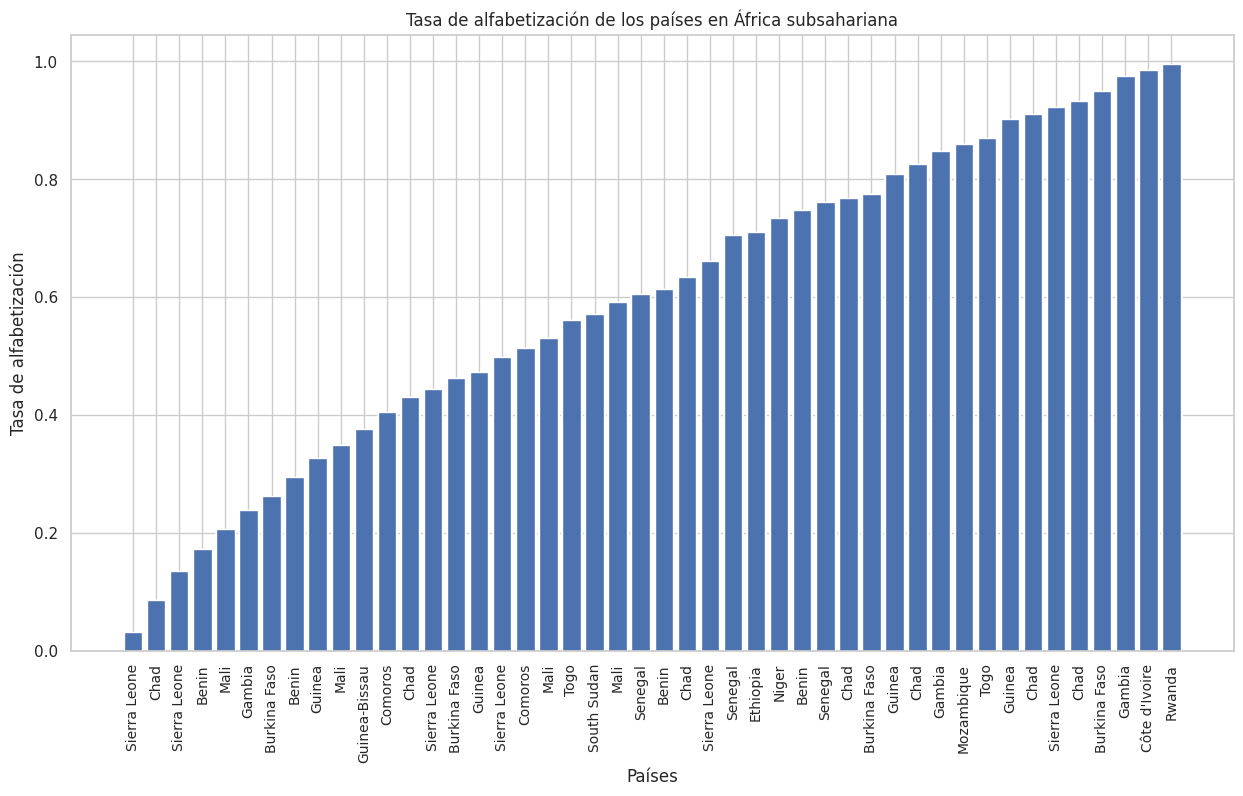

In [60]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por la columna 'Literacy rate' en orden ascendente
sorted_subsaharan_africa = subsaharan_africa.sort_values(by='Literacy rate')

# Crear un gráfico de barras verticales
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(subsaharan_africa['Country'], sorted_subsaharan_africa['Literacy rate'])

# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('Países')
ax.set_ylabel('Tasa de alfabetización')
ax.set_title('Tasa de alfabetización de los países en África subsahariana')

# Personalizar las etiquetas del eje x con los nombres de los países
ax.set_xticklabels(sorted_subsaharan_africa['Country'], rotation=90, fontsize='small')

# Mostrar el gráfico
plt.show()



Al interpretar este gráfico, podemos observar que hay varios países con tasas de alfabetización significativamente bajas, especialmente aquellos en el extremo izquierdo del gráfico. Estos países son los más preocupantes y, por lo tanto, deben ser priorizados por la organización sin fines de lucro en sus esfuerzos por mejorar la educación y la alfabetización en la región.

Además, el gráfico nos permite visualizar la distribución general de las tasas de alfabetización en África subsahariana, lo que podría ayudar a la organización a identificar patrones o tendencias regionales que podrían influir en sus intervenciones y estrategias.

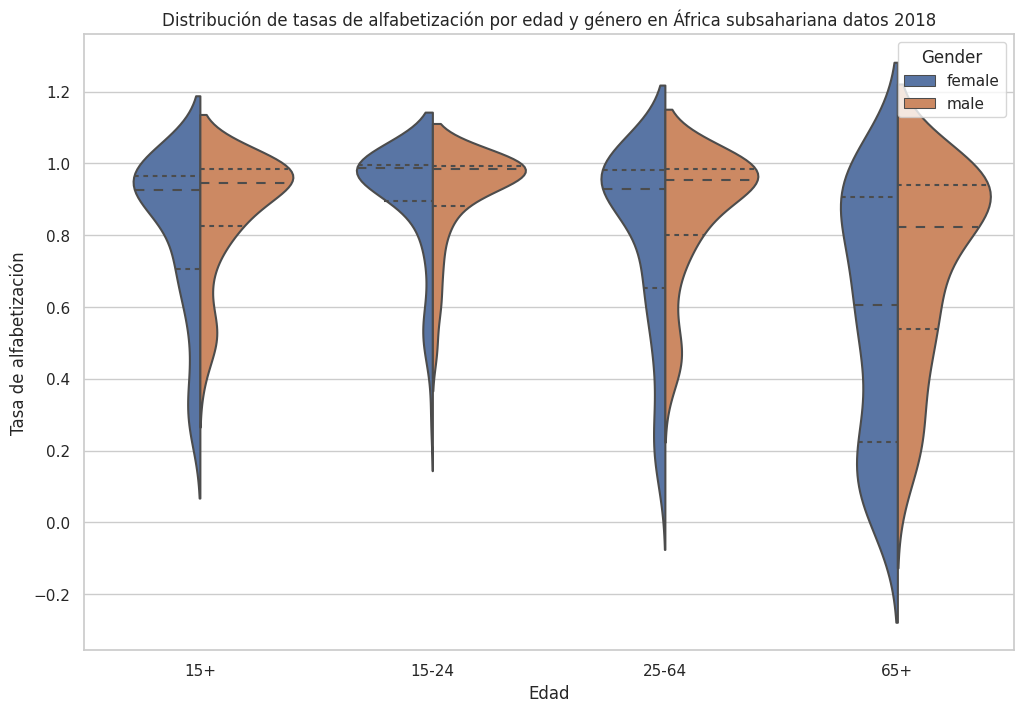

In [70]:
# Filtrar los datos para que solo contengan dos niveles de género
filtered_data = sorted_subsaharan_africa[sorted_subsaharan_africa['Gender'].isin(['female', 'male'])&(sorted_subsaharan_africa['Year']>=2018)]

# Crear un gráfico de violín
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x="Age", y="Literacy rate", hue="Gender", data=filtered_data, split=True, inner="quartile")

# Configurar las etiquetas y el título del gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Tasa de alfabetización')
ax.set_title('Distribución de tasas de alfabetización por edad y género en África subsahariana datos 2018')

# Mostrar el gráfico


# Mostrar el gráfico
plt.show()


Según el gráfico de violín, se puede observar que la mayor tasa de analfabetismo se encuentra en las personas mayores de 65 años. Además, dentro de los otros grupos de edad, también parece haber una mayor proporción de hombres con bajas tasas de alfabetización en comparación con las mujeres.

Por lo tanto, al diseñar una estrategia para mejorar la tasa de alfabetización en la región de África subsahariana, sería apropiado considerar lo siguiente:

Priorizar a las personas mayores de 65 años: Dado que este grupo de edad tiene la tasa de alfabetización mas baja, centrarse en mejorar la de estas personas puede tener un impacto significativo en la tasa general de alfabetización en la región.

Orientar a los hombres: Como se observa una mayor proporción de  
hombres con bajas tasas de alfabetización en comparación con las mujeres, especialmente en los grupos de edad más jóvenes, enfocarse en estrategias de intervención específicas para hombres puede ayudar a abordar esta brecha de género en la alfabetización.


